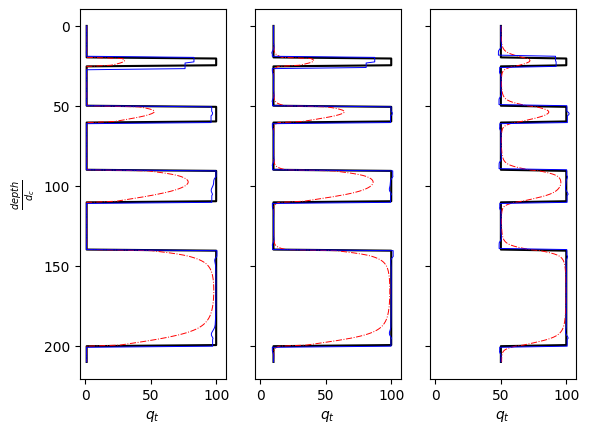

In [9]:
# Replicate Figure 5 from Boulanger and DeJong (2018)
import numpy as np
import matplotlib.pyplot as plt
import smt

q_t = []
zd_vec = []
N = 300
z50ref = 4.2
m50 = 0.5
mq = 2.0
mz = 3.0
dc = 0.03568
n_iter = 500
rate_lim = 0.1
tol = 1.e-6
dz_dec = 0.02/0.03568*dc

depth = np.linspace(0,210,N) * dc
zprime = (depth[:, np.newaxis] - depth) / dc

qt_a = np.full(N, 1.0)
qt_b = np.full(N, 10.0)
qt_c = np.full(N, 50.0)

layer1 = (depth>20*dc) & (depth<25*dc)
layer2 = (depth>50*dc) & (depth<60*dc)
layer3 = (depth>90*dc) & (depth<110*dc)
layer4 = (depth>140*dc) & (depth<200*dc)
qt_a[layer1] = 100
qt_a[layer2] = 100
qt_a[layer3] = 100
qt_a[layer4] = 100

qt_b[layer1] = 100
qt_b[layer2] = 100
qt_b[layer3] = 100
qt_b[layer4] = 100

qt_c[layer1] = 100
qt_c[layer2] = 100
qt_c[layer3] = 100
qt_c[layer4] = 100

C1 = 1.0 + zprime / 8.0
C1[zprime > 0] = 1.0
C1[zprime < -4.0] = 0.5
C2 = np.ones((len(zprime), len(zprime)), dtype=float)
C2[zprime < 0] = 0.8

# First convolve to get a layer-influenced profile
qt_a_convolved = smt.convolve(qt_a, zprime, C1, C2, z50ref, m50, mq, mz)
qt_b_convolved = smt.convolve(qt_b, zprime, C1, C2, z50ref, m50, mq, mz)
qt_c_convolved = smt.convolve(qt_c, zprime, C1, C2, z50ref, m50, mq, mz)

# Now apply inverse filter to recover original tip resistance
qt_a_inv_vec = smt.cpt_inverse_filter(qt_a_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_b_inv_vec = smt.cpt_inverse_filter(qt_b_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_c_inv_vec = smt.cpt_inverse_filter(qt_c_convolved, depth, low_pass=True, smooth=True, remove_interface=True, niter=500)


fig, ax = plt.subplots(ncols=3, sharey='row', sharex='row')
ax[0].plot(qt_a,depth/dc, c='black')
ax[0].plot(qt_a_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[0].plot(qt_a_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[1].plot(qt_b,depth/dc, c='black')
ax[1].plot(qt_b_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[1].plot(qt_b_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[2].plot(qt_c,depth/dc, c='black', label='true')
ax[2].plot(qt_c_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7, label='convolved')
ax[2].plot(qt_c_inv_vec,depth/dc, c='blue', linewidth=0.7, label='inverse filtered')
ax[0].set_ylabel(r'$\frac{depth}{d_c}$')
ax[0].set_xlabel(r'$q_t$')
ax[1].set_xlabel(r'$q_t$')
ax[2].set_xlabel(r'$q_t$')
ax[0].invert_yaxis()

In [2]:
qt_a_inv_vec = smt.cpt_inverse_filter(qt_a_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_b_inv_vec = smt.cpt_inverse_filter(qt_b_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_c_inv_vec = smt.cpt_inverse_filter(qt_c_convolved, depth, low_pass=True, smooth=True, remove_interface=True, niter=500)

# z_dec, qt_a_inv = cpt_old.layer_correct(qt=qt_a_convolved, z=z, apply_low_pass=True, smooth=True, decimate=False, removeIface=False)
# z_dec, qt_b_inv = cpt_old.layer_correct(qt=qt_b_convolved, z=z, apply_low_pass=True, smooth=True, decimate=False, removeIface=False)
# z_dec, qt_c_inv = cpt_old.layer_correct(qt=qt_c_convolved, z=z, apply_low_pass=True, smooth=True, decimate=False, removeIface=False)


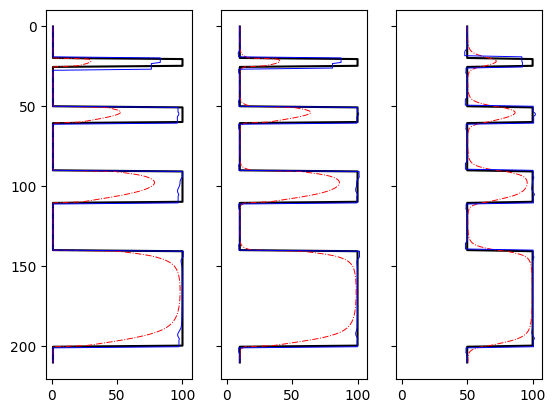

In [3]:
fig, ax = plt.subplots(ncols=3, sharey='row', sharex='row')
ax[0].plot(qt_a,depth/dc, c='black')
ax[0].plot(qt_a_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[0].plot(qt_a_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[1].plot(qt_b,depth/dc, c='black')
ax[1].plot(qt_b_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[1].plot(qt_b_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[2].plot(qt_c,depth/dc, c='black')
ax[2].plot(qt_c_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[2].plot(qt_c_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[0].invert_yaxis()

Text(0, 0.5, "$z'$")

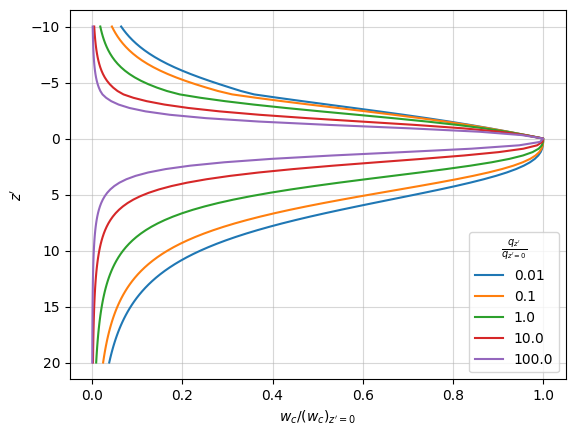

In [4]:
# Reproduce Fig. 3

fig, ax = plt.subplots()
zprime = np.linspace(-10,20,100)
C1 = 1.0 + zprime / 8.0
C1[zprime >= 0] = 1.0
C1[zprime < -4.0] = 0.5
C2 = np.ones((len(zprime)), dtype=float)
C2[zprime < 0] = 0.8
qt_ratio = np.asarray([0.01, 0.1, 1, 10, 100], dtype=float)
w2 = np.sqrt(2.0 / (1.0 + qt_ratio**mq))
zprime_50 = 1.0 + 2.0 * (C2[:, np.newaxis] * z50ref - 1.0) *(1.0 - 1.0 / (1.0 + (1/qt_ratio)**m50))
w1 = C1[:, np.newaxis] / (1 + np.abs(zprime[:, np.newaxis] / zprime_50)**mz)
wc_num = (w1 * w2)
wc_den = np.sum(w1 * w2, axis=0)
wc = wc_num / wc_den

ax.plot(wc/np.max(wc, axis=0),zprime,label=qt_ratio)

ax.invert_yaxis()
ax.legend(title=r"$\frac{q_{z'}}{q_{z'=0}}$")
ax.grid(True, alpha=0.5, which='both')
ax.set_xlabel(r"$w_c / \left(w_c\right)_{z'=0}$")
ax.set_ylabel(r"$z'$")

In [6]:
import numpy as np

def get_Ic(qt, fs, sigmav, sigmavp, pa=101.325, maxiter=30):
    qt[qt<=0] = 0.001 * pa
    fs[fs<=0] = 0.0001 * pa
    sigmav[sigmav<=0] = 0.000001 * pa
    sigmavp[sigmavp<=0] = 0.000001*pa
    F = fs / (qt - sigmav) * 100
    n = np.full(len(qt), 0.5)
    Q = (qt-sigmav)/pa*(pa/sigmavp)**n
    Ic = ((3.47-np.log10(Q))**2+(1.22+np.log10(F))**2)**0.5
    R = 0.381*Ic+0.05*(sigmavp/pa)-0.15 - n
    I = 0
    while((np.any(np.abs(R) > 0.01)) & (I < maxiter)):
        Q = (qt-sigmav)/pa*(pa/sigmavp)**n
        Ic = ((3.47-np.log10(Q))**2+(1.22+np.log10(F))**2)**0.5
        R1 = 0.381*Ic+0.05*(sigmavp/pa)-0.15 - n
        dRdn_num = 0.381*(-0.28818*((pa/sigmavp)**n*(qt-sigmav)/pa)/np.log(10)+1)*np.log(pa/sigmavp)
        dRdn_den = (0.12361*(0.81967*np.log(F)/np.log(10) + 1)**2 + ((-0.28818*((pa/sigmavp)**n*(qt-sigmav)/pa)/np.log(10)+1)**2))**0.5 * np.log(10)
        dRdn = dRdn_num / dRdn_den - 1.0
        nlast = np.copy(n)
        n = n - 1 * R1 / dRdn
        n[n>1.0] = 1.0
        n[n<0.0] = 0.0
        R2 = n - nlast
        R = np.minimum(np.abs(R1), np.abs(R2))
        print(np.max(np.abs(R)))
        I += 1
    return Ic

12.34000825881958


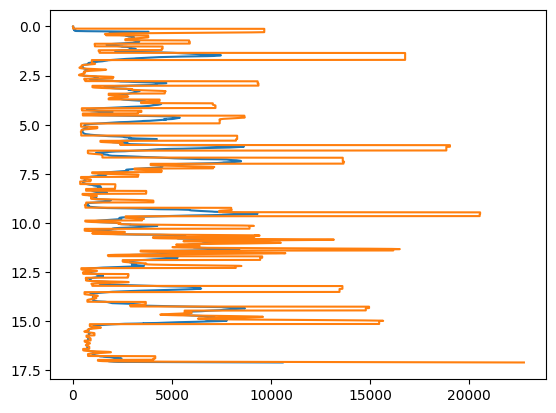

In [11]:
#The purpose of this sheet is to reproduce the CPT profile at St. Theresa's school (Fig. 17) in the paper by Boulanger and DeJong (2018)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#To see a list of options, un-comment the line below:
#cpt.help()

file = open("CPT_45185_Raw01.TXT")
z = []
qt = []
fs = []
for i, line in enumerate(file):
    if(i>15):
        z.append(float(line.split()[0]))
        qt.append(float(line.split()[8])*1000)
        fs.append(float(line.split()[2])*1000)
file.close()

z = np.asarray(z)
qt = np.asarray(qt)
fs = np.asarray(fs)
sigmav = 19*z
zgwt = 1
u = 9.81*(z - zgwt)
u[u<0] = 0
sigmavp = sigmav - u
fig, ax = plt.subplots()
ax.plot(qt,z)
start_time = time.time()
z_dec, qt_inv, fs_inv = smt.cpt_inverse_filter(qt=qt, z=z, fs=fs, sigmav=sigmav, sigmavp=sigmavp, low_pass=True, smooth=True, remove_interface=True)
print(time.time() - start_time)

ax.plot(qt_inv,z_dec)
ax.invert_yaxis()

In [ ]:
import scipy as sp

gamma = np.full(len(z), 19)
sigmav = sp.integrate.cumulative_trapezoid(gamma, z, initial=0)
dgwt = 2
u = 9.81*(z-dgwt)
u[u<0] = 0
sigmavp = sigmav - u

fig, ax = plt.subplots()
ax.plot(sigmav, z)
ax.plot(u, z)
ax.plot(sigmavp, z)
ax.invert_yaxis()
ax.grid(True, alpha=0.5)

In [8]:
get_Ic(qt, fs, sigmav, sigmavp)

0.5
0.2214833033441389
0.013366731339646831
0.0010394376359186275


array([1.7479193 , 2.39906204, 2.5691741 , ..., 2.31526603, 2.08727158,
       1.7749129 ])

<IPython.core.display.Javascript object>


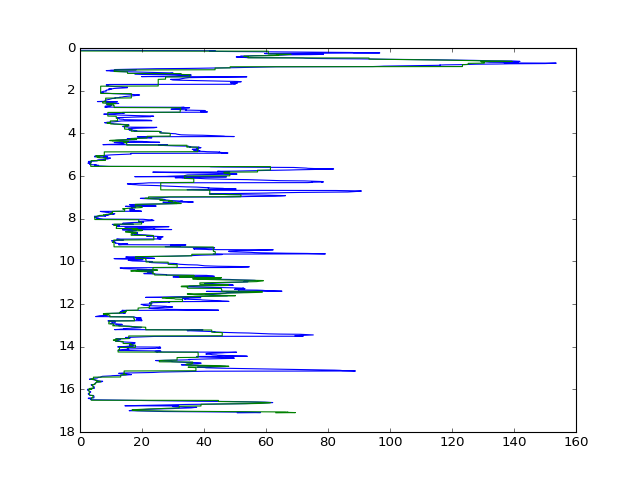

In [6]:
# Compare inverted profile with the one provided by Ross
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
file = open('CPT_45185_Inverse_filtered.TXT')
z1 = []
qt1 = []
fs1 = []
for i, line in enumerate(file):
    if(i>1):
        z1.append(float(line.split()[0]))
        qt1.append(float(line.split()[1])*101.325)
        fs1.append(float(line.split()[2])*101.325)
#plt.plot(qt_inv,z_dec)
#plt.plot(qt1,z1)
plt.plot(fs_inv,z_dec)
plt.plot(fs1,z1)
plt.gca().invert_yaxis()

In [21]:
def get_Ic_qc1Ncs(qt, fs, sigmav, sigmavp, FC, pa=101.325, maxiter=30):
    qt[qt<=0] = 0.001 * pa
    fs[fs<=0] = 0.001 * pa
    sigmav[sigmav<=0] = 0.001 * pa
    sigmavp[sigmavp<=0] = 0.001*pa
    Fr = fs / (qt - sigmav) * 100
    n = np.full(len(qt), 0.5)
    Qtn = (qt-sigmav)/pa*(pa/sigmavp)**n
    Ic = ((3.47-np.log10(Qtn))**2+(1.22+np.log10(Fr))**2)**0.5
    R = 0.381*Ic+0.05*(sigmavp/pa)-0.15 - n
    I = 0
    while((np.any(np.abs(R) > 0.01)) & (I < maxiter)):
        Qtn = (qt-sigmav)/pa*(pa/sigmavp)**n
        Ic = ((3.47-np.log10(Qtn))**2+(1.22+np.log10(Fr))**2)**0.5
        R1 = 0.381*Ic+0.05*(sigmavp/pa)-0.15 - n
        dRdn = (
            0.381*(-0.28818*((pa/sigmavp)**n*(qt-sigmav)/pa)/np.log(10)+1)*np.log(pa/sigmavp)
            / (0.12361*(0.81967*np.log(Fr)/np.log(10) + 1)**2 + ((-0.28818*((pa/sigmavp)**n*(qt-sigmav)/pa)/np.log(10)+1)**2))**0.5 * np.log(10)
            - 1.0
        )
        nlast = np.copy(n)
        n = n - R1 / dRdn
        n[n>1.0] = 1.0
        n[n<0.0] = 0.0
        R2 = n - nlast
        R = np.minimum(np.abs(R1), np.abs(R2))
        I += 1
    if(FC == None):
        FC = (
            np.exp(2.084 * Ic - 5.066 + 1.869 * FC_epsilon)
            / (1.0 + np.exp(2.084 * Ic - 5.066 + 1.869 * FC_epsilon))
            * 100
        )
    else:
        FC = np.full(len(qt), 0.0)
    m = np.full(len(qt), 0.5)
    CN = (pa/sigmavp)**m
    qc1N = CN * qt / pa
    dqc1N = (11.9 + qc1N / 14.6) * np.exp(
        1.63 - 9.7 / (FC + 2) - (15.7 / (FC + 2)) ** 2
    )
    qc1Ncs = qc1N + dqc1N
    R = np.abs(m - (1.338 - 0.249 * qc1Ncs ** 0.264))
    I = 0
    while(np.any(R > 0.01) & (I < maxiter)):
        CN = (pa / sigmavp) ** m
        qc1N = CN * qt / pa
        dqc1N = (11.9 + qc1N / 14.6) * np.exp(
            1.63 - 9.7 / (FC + 2) - (15.7 / (FC + 2)) ** 2
        )
        qc1Ncs = qc1N + dqc1N
        R1 = m - (1.338 - 0.249 * qc1Ncs ** 0.264)
        mlast = np.copy(m)
        dRdm = (
            0.382899 * (0.018082 * (pa/sigmavp)**m)*np.exp(-9.7/(FC+2) - 246.49/(FC+2)**2) * np.log(pa/sigmavp) / pa + 0.051725 * (pa/sigmavp)**m * np.log(pa/sigmavp) / pa
            / ((0.06849315 * (pa/sigmavp)**m / pa + 11.9) * np.exp(-9.7/(FC+2) - 246.49/(FC+2)**2) + 0.19592957*(pa/sigmavp)**m / pa)**0.736
            +1.0
        )
        m = m - R1 / dRdm
        R2 = m - mlast
        R = np.minimum(np.abs(R1), np.abs(R2))
        I += 1
    return (qc1Ncs, Ic, qc1N, Qtn, Fr, FC)
get_Ic_qc1Ncs(qt, fs, sigmav, sigmavp, FC=None, FC_epsilon=0, pa=101.325, maxiter=30)

TypeError: get_Ic_qc1Ncs() got an unexpected keyword argument 'FC_epsilon'

In [20]:
## Make sure inputs are not zero to avoid numerical errors
pa = 101.325
maxiter = 30
qt[qt<=0] = 0.001 * pa
fs[fs<=0] = 0.001 * pa
sigmav[sigmav<=0] = 0.001 * pa
sigmavp[sigmavp<=0] = 0.001*pa

# Develop initial estimates
Fr = fs / (qt - sigmav) * 100
n = np.full(len(qt), 0.5)
Qtn = (qt - sigmav) / pa * (pa / sigmavp) ** n
Ic = ((3.47 - np.log10(Qtn)) ** 2 + (1.22 + np.log10(Fr)) ** 2) ** 0.5
R = 0.381 * Ic + 0.05 * (sigmavp / pa) - 0.15 - n

# Iterate until convergence
I = 0
unconverged = np.full(len(qt), True)
dRdn = np.zeros(len(qt), dtype=float)
nlast = np.zeros(len(qt), dtype=float)
R1 = np.zeros(len(qt), dtype=float)
R2 = np.zeros(len(qt), dtype=float)
while(np.any(unconverged) & (I < maxiter)):
    Qtn[unconverged] = (qt[unconverged] - sigmav[unconverged]) / pa * (pa / sigmavp[unconverged]) ** n[unconverged]
    Ic[unconverged] = ((3.47 - np.log10(Qtn[unconverged])) ** 2 + (1.22 + np.log10(Fr[unconverged])) ** 2) ** 0.5
    R1[unconverged] = 0.381 * Ic[unconverged] + 0.05*(sigmavp[unconverged] / pa) - 0.15 - n[unconverged]
    dRdn[unconverged] = (
        0.381 * (-0.28818 * ((pa / sigmavp[unconverged]) ** n[unconverged] * (qt[unconverged] - sigmav[unconverged]) / pa) / np.log(10) + 1.0) * np.log(pa / sigmavp[unconverged])
        / (0.12361 * (0.81967 * np.log(Fr[unconverged]) / np.log(10) + 1) ** 2.0 + ((-0.28818 * ((pa / sigmavp[unconverged]) ** n[unconverged] * (qt[unconverged] - sigmav[unconverged]) / pa) / np.log(10) + 1.0) ** 2.0)) ** 0.5 * np.log(10)
        - 1.0
    )
    nlast[unconverged] = np.copy(n[unconverged])
    n[unconverged] = n[unconverged] - R1[unconverged] / dRdn[unconverged]
    n[n>1.0] = 1.0
    n[n<0.0] = 0.0
    R2[unconverged] = n[unconverged] - nlast[unconverged]
    R[unconverged] = np.minimum(np.abs(R1[unconverged]), np.abs(R2[unconverged]))
    unconverged = np.abs(R) > 0.01
    I += 1

0
1
2
3
4
5
6
7
8


In [23]:
epsilon = 0
FC = (
        np.exp(2.084 * Ic - 5.066 + 1.869 * epsilon)
        / (1 + np.exp(2.084 * Ic - 5.066 + 1.869 * epsilon))
        * 100
    )

In [38]:
# Set zero values to small numbers for numerical stability
qt[qt<=0] = 0.001 * pa
fs[fs<=0] = 0.001 * pa
sigmav[sigmav<=0] = 0.001 * pa
sigmavp[sigmavp<=0] = 0.001 * pa

# Iterate on overburden correction term
m = np.full(len(qt), 0.5)
CN = (pa / sigmavp) ** m
qc1N = CN * qt / pa
dqc1N = (11.9 + qc1N / 14.6) * np.exp(
    1.63 - 9.7 / (FC + 2) - (15.7 / (FC + 2)) ** 2
)
qc1Ncs = qc1N + dqc1N
R = np.abs(m - (1.338 - 0.249 * qc1Ncs ** 0.264))
I = 0
while(np.any(R > 0.01) & (I < maxiter)):
    CN = (pa / sigmavp) ** m
    qc1N = CN * qt / pa
    dqc1N = (11.9 + qc1N / 14.6) * np.exp(
        1.63 - 9.7 / (FC + 2) - (15.7 / (FC + 2)) ** 2
    )
    qc1Ncs = qc1N + dqc1N
    R1 = m - (1.338 - 0.249 * qc1Ncs ** 0.264)
    mlast = np.copy(m)
    dRdm = (
        0.382899 * (0.018082 * (pa / sigmavp) ** m) * np.exp(-9.7 / (FC + 2.0) - 246.49 / (FC + 2.0) ** 2.0) * np.log(pa / sigmavp) / pa + 0.051725 * (pa / sigmavp) ** m * np.log(pa / sigmavp) / pa
        / ((0.06849315 * (pa / sigmavp) ** m / pa + 11.9) * np.exp(-9.7 / (FC + 2.0) - 246.49 / (FC + 2.0) ** 2.0) + 0.19592957 * (pa / sigmavp) ** m / pa) ** 0.736
        + 1.0
    )
    m = m - R1 / dRdm
    m[m<0] = 0
    m[m>1] = 1
    R2 = m - mlast
    R = np.minimum(np.abs(R1), np.abs(R2))
    I += 1

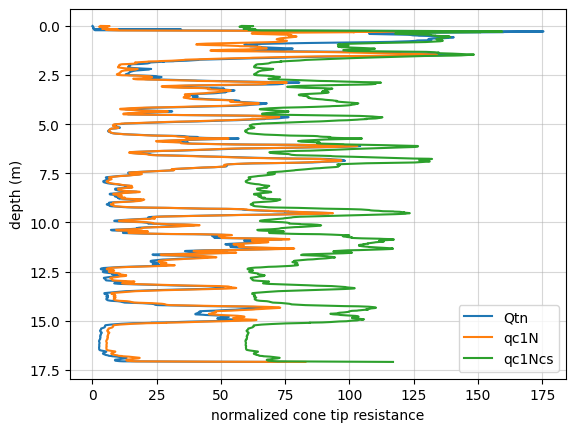

In [47]:
fig, ax = plt.subplots()

ax.plot(Qtn, z, label='Qtn')
ax.plot(qc1N, z, label='qc1N')
ax.plot(qc1Ncs, z, label='qc1Ncs')
ax.set_xlabel('normalized cone tip resistance')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
ax.grid(True, alpha=0.5)
ax.legend()

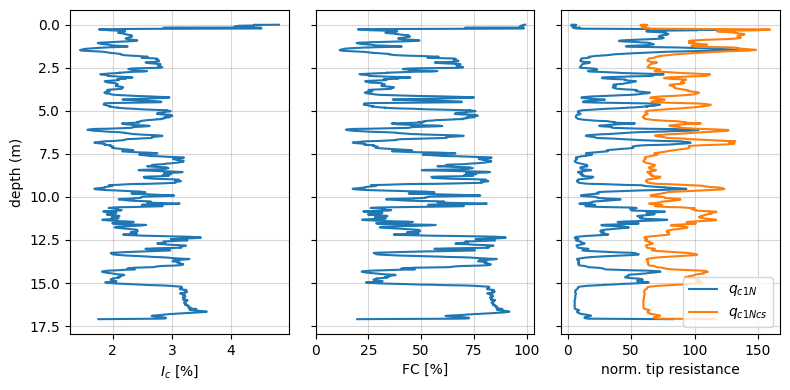

In [55]:
fig, ax = plt.subplots(ncols=3, sharey='row', figsize=(8,4))
ax[0].plot(Ic, z)
ax[1].plot(FC, z)
ax[0].invert_yaxis()
ax[0].grid(True, alpha=0.5)
ax[1].grid(True, alpha=0.5)
ax[1].set_xlabel('FC [%]')
ax[0].set_xlabel(r'$I_c$ [%]')
ax[0].set_ylabel('depth (m)')
#ax[2].plot(Qtn, z, label='Qtn')
ax[2].plot(qc1N, z, label=r'$q_{c1N}$')
ax[2].plot(qc1Ncs, z, label=r'$q_{c1Ncs}$')
ax[2].set_xlabel('norm. tip resistance')
ax[2].legend()
ax[2].grid(True, alpha=0.5)
ax[1].set_xlim(0)
plt.tight_layout()

In [8]:
from ngl_tools import smt
test = smt.cpt_inverse_filter(qt=qt_a_convolved, z=z, low_pass=True, smooth=True, remove_interface=False)

In [9]:
Ic, Qtn, Fr = get_Ic_Qtn_Fr(qt

smt.cpt_layering(qc1Ncs, Ic, z, 0, None, 0.5)

NameError: name 'qc1Ncs' is not defined

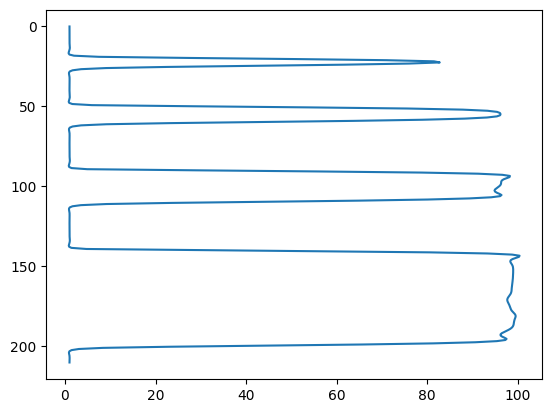

In [7]:
fig, ax = plt.subplots()
ax.plot(test[1],z/dc)
ax.invert_yaxis()